# Exploration

In [2]:
import numpy as np
import networkx
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
data_path = Path("data")

# Postings

In [4]:
postings_first = pd.read_csv("data/Postings_01052019_15052019.csv", sep=';', dtype=str)
postings_last = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';', dtype=str)

In [5]:
postings = pd.concat([postings_first, postings_last])

In [6]:
postings.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1041073234,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1041072504,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1041068600,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1041080236,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470


In [7]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739094 entries, 0 to 395933
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_Posting             739094 non-null  object
 1   ID_Posting_Parent      500313 non-null  object
 2   ID_CommunityIdentity   739094 non-null  object
 3   PostingHeadline        207297 non-null  object
 4   PostingComment         677307 non-null  object
 5   PostingCreatedAt       739094 non-null  object
 6   ID_Article             739094 non-null  object
 7   ArticlePublishingDate  739094 non-null  object
 8   ArticleTitle           739094 non-null  object
 9   ArticleChannel         739094 non-null  object
 10  ArticleRessortName     739094 non-null  object
 11  UserCommunityName      739093 non-null  object
 12  UserGender             549669 non-null  object
 13  UserCreatedAt          739094 non-null  object
dtypes: object(14)
memory usage: 84.6+ MB


How many different users are there

In [8]:
postings["ID_CommunityIdentity"].value_counts()

ID_CommunityIdentity
518647    1677
37541     1410
516173    1371
59327     1235
499749    1226
          ... 
535622       1
505487       1
574625       1
692361       1
655206       1
Name: count, Length: 23925, dtype: int64

In [10]:
relations = pd.read_csv("data/Following_Ignoring_Relationships_01052019_31052019.csv", sep=';', dtype=str)

In [28]:
relations.columns = ["user_id", "followed_id", "type"]

In [29]:
relations.head()

,user_id,followed_id,type
0,1778,246490,1
1,5872,5872,1
2,9030,23875,1
3,9030,508504,1
4,10569,10569,1


In [30]:
nodes = pd.concat([relations["user_id"], relations["followed_id"]])

In [31]:
len(nodes)

173552

In [32]:
nodes = nodes.unique()

In [33]:
len(nodes)

17485

In [35]:
import networkx as nx

In [36]:
G = nx.Graph()

In [37]:
G.add_nodes_from(nodes)

In [40]:
G.nodes

NodeView(('1778', '5872', '9030', '10569', '13391', '14060', '16785', '20447', '20847', '1258', '3466', '4384', '5487', '9281', '10518', '15548', '15801', '19778', '20010', '20882', '1782', '2273', '5460', '7664', '9538', '15911', '20257', '20534', '20700', '21663', '5006', '6101', '6410', '6637', '8318', '9309', '13498', '13689', '18010', '18044', '22081', '23683', '24128', '28804', '29301', '30980', '31373', '2177', '10051', '11320', '13359', '13477', '14996', '16435', '16500', '20647', '21179', '21180', '22552', '27632', '27967', '29486', '30507', '254', '4255', '6095', '8624', '10339', '12636', '16030', '20799', '21010', '22414', '23214', '27058', '31570', '31588', '37061', '37147', '38190', '38701', '40398', '41516', '41584', '43270', '46764', '46796', '49097', '49497', '4139', '6454', '8008', '9194', '10705', '14860', '16096', '17575', '21601', '22062', '22205', '22698', '24309', '24613', '26649', '28621', '28707', '31983', '33126', '37013', '43411', '45669', '47848', '51778', '5

In [38]:
relations.head()

,user_id,followed_id,type
0,1778,246490,1
1,5872,5872,1
2,9030,23875,1
3,9030,508504,1
4,10569,10569,1


In [44]:
for _, row in relations.iterrows():
    if row["type"] == "1":
        G.add_edge(row['user_id'], row['followed_id'])
        G.add_edge(row['followed_id'], row['user_id'])
    else:
        G.add_edge(row['user_id'], row['followed_id'])

In [45]:
G.nodes

NodeView(('1778', '5872', '9030', '10569', '13391', '14060', '16785', '20447', '20847', '1258', '3466', '4384', '5487', '9281', '10518', '15548', '15801', '19778', '20010', '20882', '1782', '2273', '5460', '7664', '9538', '15911', '20257', '20534', '20700', '21663', '5006', '6101', '6410', '6637', '8318', '9309', '13498', '13689', '18010', '18044', '22081', '23683', '24128', '28804', '29301', '30980', '31373', '2177', '10051', '11320', '13359', '13477', '14996', '16435', '16500', '20647', '21179', '21180', '22552', '27632', '27967', '29486', '30507', '254', '4255', '6095', '8624', '10339', '12636', '16030', '20799', '21010', '22414', '23214', '27058', '31570', '31588', '37061', '37147', '38190', '38701', '40398', '41516', '41584', '43270', '46764', '46796', '49097', '49497', '4139', '6454', '8008', '9194', '10705', '14860', '16096', '17575', '21601', '22062', '22205', '22698', '24309', '24613', '26649', '28621', '28707', '31983', '33126', '37013', '43411', '45669', '47848', '51778', '5

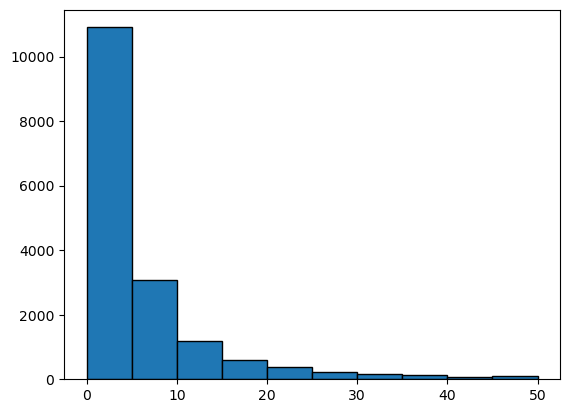

In [46]:
degree_list = [k for v,k in nx.degree(G)]
plt.hist(degree_list, range =(0, 50), edgecolor = "black")
plt.show()

### Network Centrality

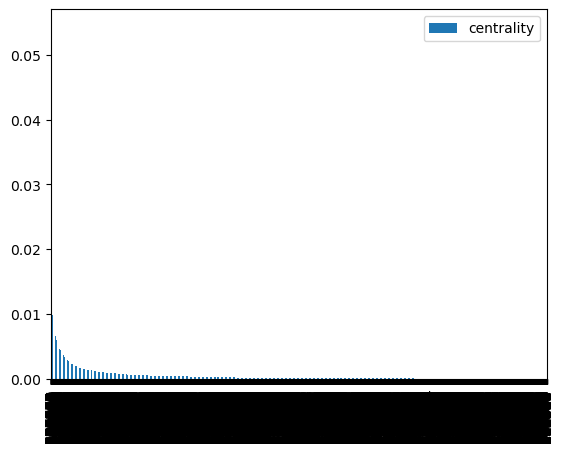

In [ ]:
centrality_dict = nx.degree_centrality(G)
centrality_df = pd.DataFrame.from_dict(centrality_dict, orient="index", columns=["centrality"])

centrality_df.sort_values('centrality', ascending=False).plot(kind="bar");

In [ ]:
## Compute a layout
pos = nx.kamada_kawai_layout(G,
                             weight="interactions",
                             scale=1)

In [ ]:
nx.draw_networkx(G,
                 pos=pos,
                 node_size=50,
                 font_size=7,
                 width=0.1, ## Edge width
                 nodelist=nodes,
                 cmap="Set1",
                 with_labels=True,
                 font_color="k"
                 )